# E-Commerce Brazil - Análise Exploratória de Dados e Processamento de Ling. Natural

# 1 Características do conjunto de dados

In [1]:
%pip install --upgrade plotly
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import json
import re

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from PIL import Image

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

Temos 6 arquivos com informações sobre clientes, vendedores, metodo de pagamento, produtos, compras e avaliações.    

In [4]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_itens = pd.read_csv("olist_order_items_dataset.csv")
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_order_status = pd.read_csv("olist_orders_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")


## 1.1 Informações dos Clientes

Colunas:
1. customer_id
2. customer_unique_id
3. customer_zip_code_prefix
4. customer_city
5. customer_state


Estrutura do *dataframe*:


In [5]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_customers.shape

(99441, 5)

In [7]:
print(f"Nulos(Nan): {df_customers.isna().values.any()}")
print(f"Valores Duplicados: {df_customers.duplicated().values.any()}")

Nulos(Nan): False
Valores Duplicados: False


In [8]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
print(df_customers["customer_id"].nunique())
print(df_customers["customer_unique_id"].nunique())

99441
96096


O "customer_id" trata cada compra como um valor separado, o que significa que um mesmo cliente pode aparecer com IDs diferentes se mais de uma compra for feita. Por outro lado, a coluna "customer_unique_id" é usada para identificar clientes individuais, o que significa que cada cliente único terá um "customer_unique_id" distinto.

Ocorrencia dos Estados:

In [10]:
num_states = df_customers["customer_state"].value_counts()
num_states

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

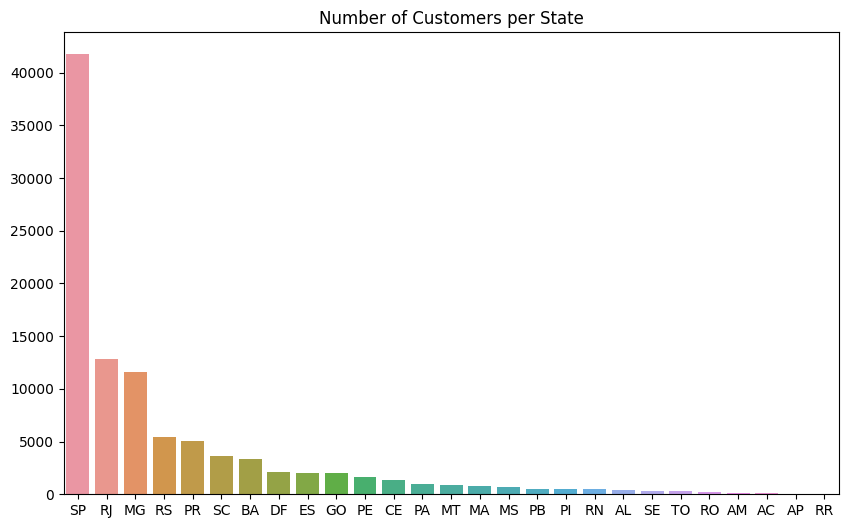

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=num_states.index, y=num_states.values)
plt.title("Number of Customers per State")
plt.show()

A maioria das instâncias na tabela ocorreu em SP, RJ e MG, que são os três estados mais populosos. Vamos ver as cidades:

In [12]:
num_city = df_customers["customer_city"].value_counts()
num_city[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

As capitais dos três estados mais prevalentes coincidem com as cidades com mais ocorrências nos dados.

## 1.2 Vendedores 

In [13]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
print(f"Nan values: {df_sellers.isna().values.any()}")
print(f"Duplicated: {df_sellers.duplicated().values.any()}")

Nan values: False
Duplicated: False


In [15]:
df_sellers.shape

(3095, 4)

In [16]:
state_sellers = df_sellers["seller_state"].value_counts()
state_sellers

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

Para as informações dos vendedores, SP aparece em primeiro, seguido pelo PR, MG e SC.

## 1.3. Itens

Colunas:
1. order_id
2. order_item_id*
3. product_id
4. seller_id
5. shipping_date_limit  
6. price
7. freight_value

*Essa coluna indica a itentificação do item dentro de um mesmo pedido, ou seja se dois produtos iguais foram comprados em um mesmo pedido na tabela teremos duas intâncias com os mesmas informações sobre cliente e produto, contudo um com order_item_id=1 e a outra com order_item_id=2. 

In [17]:
df_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
df_itens.shape

(112650, 7)

In [19]:
print(f"Valores Nulos: {df_itens.isna().values.any()}")
print(f"Valores Duplicados: {df_itens.duplicated().values.any()}")

Valores Nulos: False
Valores Duplicados: False


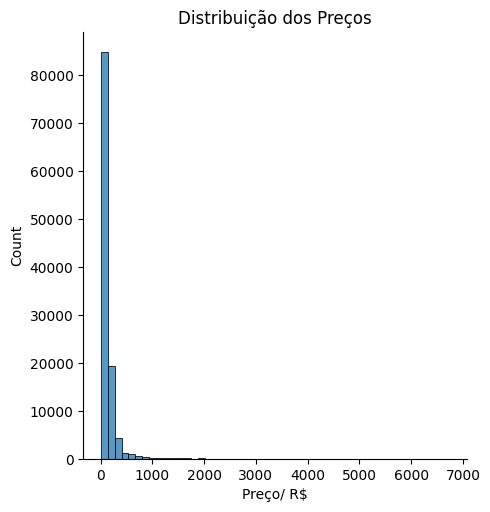

In [20]:
sns.displot(df_itens, x='price', bins=50)
plt.title("Distribuição dos Preços")
plt.xlabel("Preço/ R$")
plt.show()

## 1.4 Métodos de Pagamento

Colunas:
1. order_id
2. payment_sequential
3. payment_type
4. payment_installments
5. payment_value  


In [21]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
print(f"Valores Nulos: {df_payments.isna().values.any()}")
print(f"Valores Duplicados: {df_payments.duplicated().values.any()}")

Valores Nulos: False
Valores Duplicados: False


In [23]:
pay_type = df_payments["payment_type"].value_counts()
pay_type

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Text(0, 0.5, 'Frequência')

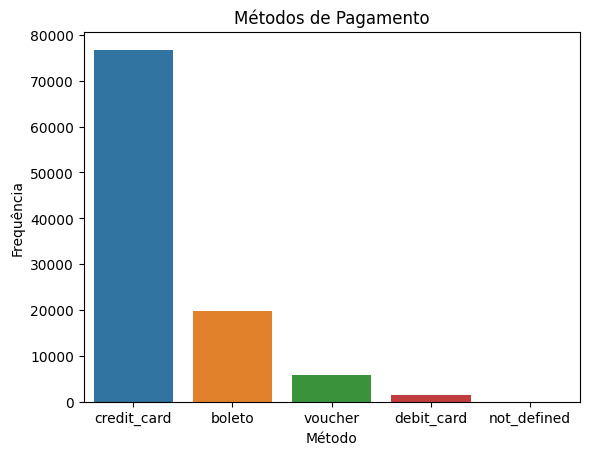

In [24]:
sns.barplot(x=pay_type.index, y=pay_type.values)
plt.title("Métodos de Pagamento")
plt.xlabel("Método")
plt.ylabel("Frequência")

## 1.5 Avaliações

Colunas:
1. review_id
2. order_id
3. review_score
4. review_comment_title
5. review_comment_message  
6. review_creation_date
7. review_answer_timestamp

In [25]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [26]:
df_reviews.shape

(99224, 7)

In [27]:
print(f"Valores Nulos: {df_reviews.isna().values.any()}")
print(f"Valores Duplicados: {df_reviews.duplicated().values.any()}")

Valores Nulos: True
Valores Duplicados: False


In [28]:
df_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Muitas pessoas submetem um avaliação sem texto, apenas com nota.

In [29]:
score_count = df_reviews['review_score'].value_counts()

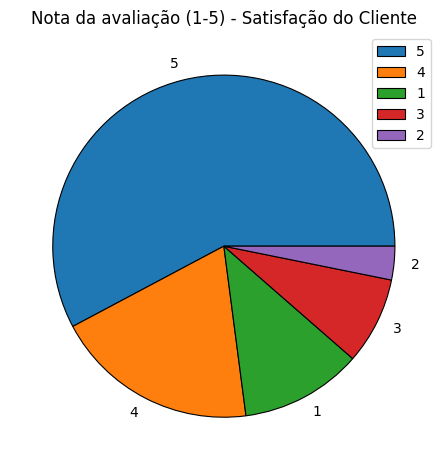

In [30]:
plt.pie(score_count, labels = score_count.index, wedgeprops = {"edgecolor" : "black",'linewidth': 0.8})
plt.title('Nota da avaliação (1-5) - Satisfação do Cliente')
plt.tight_layout()
plt.legend()

## 1.6 Pedidos

Colunas:
1. order_id
2. customer_id
3. order_status
4. order_purchase_timestamp
5. order_approved_at
6. order_delivered_carreir_date
7. order_delivered_customer_date
8. order_estimated_delivery_date

In [31]:
df_order_status.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
df_order_status.shape

(99441, 8)

In [33]:
print(f"Valores Nulos: {df_order_status.isna().values.any()}")
print(f"Valores Duplicados: {df_order_status.duplicated().values.any()}")

Valores Nulos: True
Valores Duplicados: False


In [34]:
df_order_status.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Podemos ver que algmas das data não tem valores. No caso são um indicio de compra incompleta, seja na aprovação do pedido ou na entrega. 

In [35]:
df_order_status[df_order_status['order_delivered_customer_date'].isnull()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [36]:
df_order_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [37]:
order_status=df_order_status['order_status'].value_counts()/df_order_status['order_status'].count()
order_status

delivered     0.97
shipped       0.01
canceled      0.01
unavailable   0.01
invoiced      0.00
processing    0.00
created       0.00
approved      0.00
Name: order_status, dtype: float64

97 % dos pedidos foram concluídos com sucesso.

## 1.7 Produtos e Categorias

In [38]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [39]:
print(f"Nan values: {df_products.isna().values.any()}")
print(f"Duplicated: {df_products.duplicated().values.any()}")

Nan values: True
Duplicated: False


In [40]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
categories = df_products['product_category_name'].value_counts()
top30 = categories[:30]

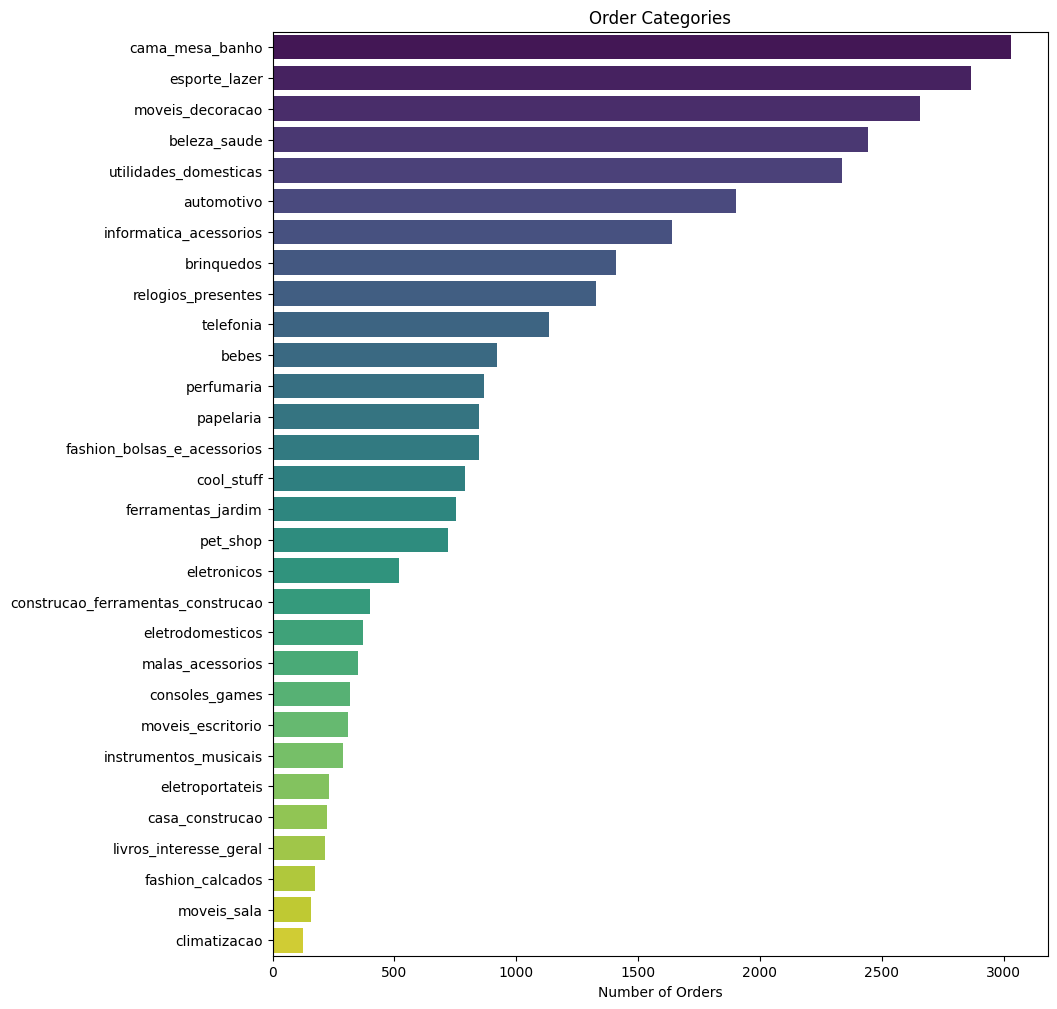

In [42]:
plt.figure(figsize=(10,12))
sns.barplot(x=top30.values, y=top30.index, palette='viridis')
plt.title("Order Categories")
plt.xlabel('Number of Orders')
plt.show()


# 2 Análise Exploratória de Dados 


Nesta seção, apresentaremos a Análise Exploratória de Dados (EDA). Nossa análise será focada na distribuição geográfica de clientes e vendedores, receita e pontuações de avaliação por categoria, e a série temporal de vendas que abrange de 2016 a 2018. Ao explorar esses fatores, nosso objetivo é obter insights valiosos sobre o conjunto de dados e compreender melhor os padrões e tendências subjacentes.

## 2.1 Distribuição Geográfica de Vendeores e Clientes





In [43]:
num_states = df_customers['customer_state'].value_counts()

In [44]:
# geojson = json.load(open('brazil_geo.json'))
# map_states = px.choropleth(locations=num_states.index, color=num_states.values, title="Purchase per State", geojson=geojson, scope='south america', color_continuous_scale=px.colors.sequential.matter)
# map_states.update_layout(coloraxis_showscale=True)
# map_states.show()



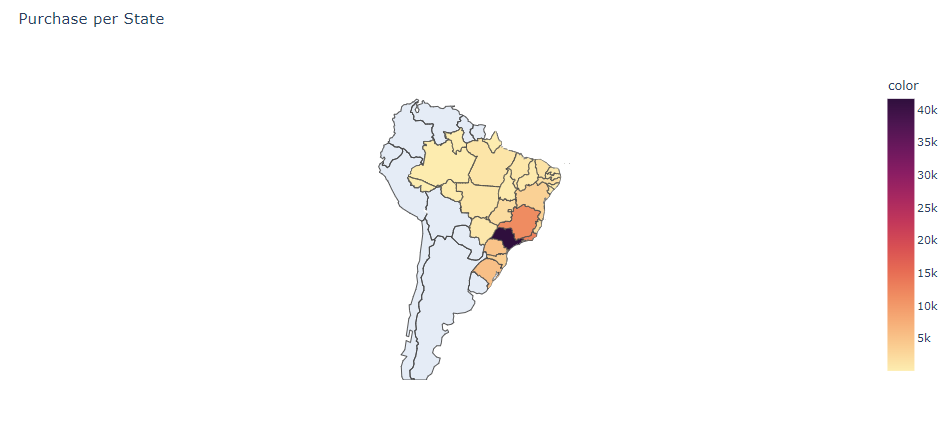

In [45]:
state_sellers = df_sellers["seller_state"].value_counts()

In [46]:
# geojson = json.load(open('brazil_geo.json'))
# map_states_sell = px.choropleth(locations=state_sellers.index, color=state_sellers.values, title="Sellers per State", geojson=geojson, scope='south america', color_continuous_scale=px.colors.sequential.matter)
# map_states_sell.update_layout(coloraxis_showscale=True)
# map_states_sell.show()



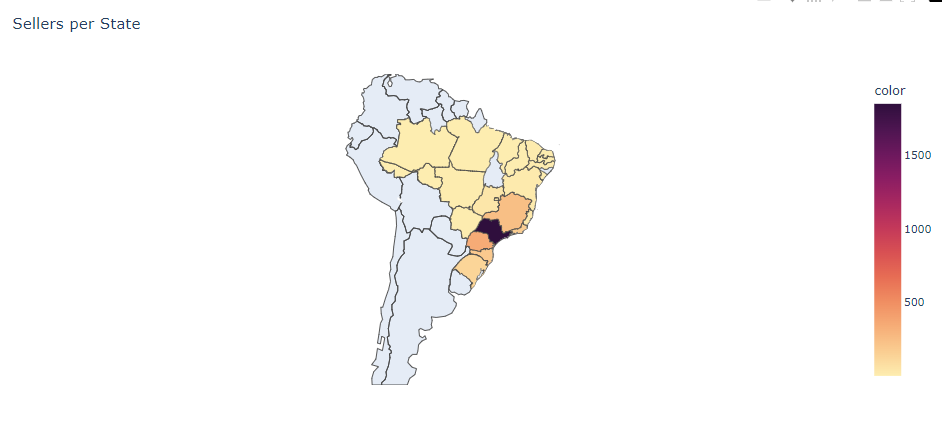

## 2.2 Avaliações Por Categorias

In [47]:
df = pd.merge(df_itens, df_products, on='product_id', how="inner")
merged = df[['order_id', 'order_item_id', 'product_id','seller_id', 'price', 'freight_value', 'product_category_name']]
merged.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff


In [48]:
merged.shape

(112650, 7)

In [49]:
df_review_cat = merged.merge(df_reviews, on='order_id', how='inner')
df_review_cat.drop(['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)
df_review_cat.head(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,17.96,cool_stuff,b11cba360bbe71410c291b764753d37f,5
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,18.33,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,16.17,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,426f43a82185969503fb3c86241a9535,5
5,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,26.93,cool_stuff,c752337ac465a5e2fbdbedf7d79c6659,5
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,38.50,cool_stuff,b41646a4365a1411101396c097413907,5
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,18.12,cool_stuff,dbacd3ac90ace7ad49fe8b31bbad2808,5
8,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,58.90,17.83,cool_stuff,dbacd3ac90ace7ad49fe8b31bbad2808,5
9,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,35.71,cool_stuff,4e58c72bb0373240b2bd9bf84b493a69,1


In [50]:
df_review_cat.shape

(112372, 9)

In [51]:
df_gb_cat = df_review_cat.groupby(['product_category_name']).agg({"price":"mean", "review_score": "mean"}).reset_index()
df_gb_cat.head()

,product_category_name,price,review_score
0,agro_industria_e_comercio,342.12,4.00
1,alimentos,58.46,4.22
2,alimentos_bebidas,54.64,4.32
3,artes,116.12,3.94
4,artes_e_artesanato,75.58,4.12


In [52]:
df_gb_cat_bottom = df_gb_cat.sort_values(['review_score'])

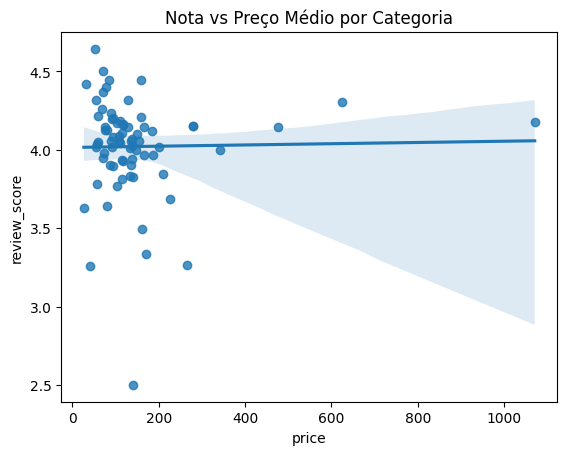

In [53]:
sns.regplot(data=df_gb_cat, x='price', y='review_score')
plt.title('Nota vs Preço Médio por Categoria')
plt.show()

There are no aparent relationships between price and ratings.

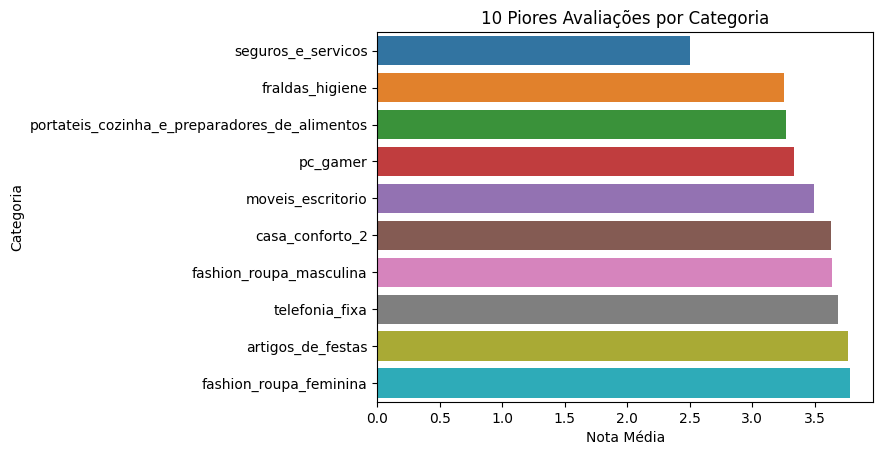

In [54]:
bottom10 = df_gb_cat_bottom[:10]
sns.barplot(data=bottom10, x='review_score', y='product_category_name')
plt.title('10 Piores Avaliações por Categoria')
plt.xlabel('Nota Média')
plt.ylabel('Categoria')
plt.show()

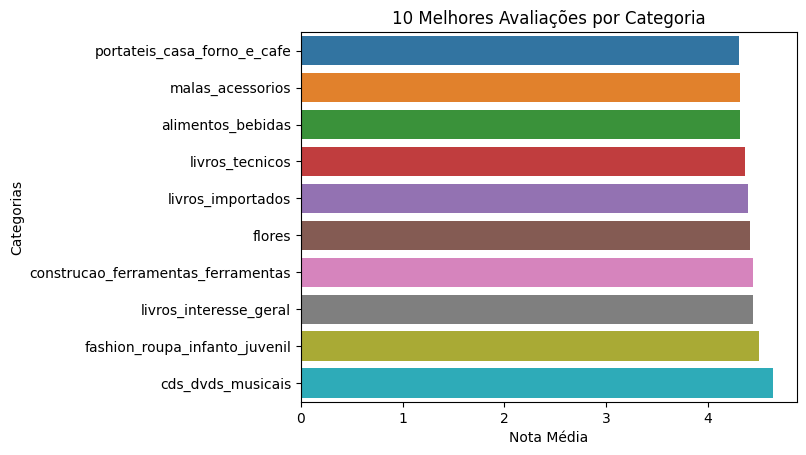

In [55]:
top10 = df_gb_cat_bottom[-10:]
sns.barplot(data=top10, x='review_score', y='product_category_name')
plt.title('10 Melhores Avaliações por Categoria')
plt.xlabel('Nota Média')
plt.ylabel('Categorias')
plt.show()

As três pontuações de avaliação mais baixas são das categorias "seguros-e-servicos", "fraldas_higiene" e "portateis_cozinha_e_preparadores_de_alimento". E as pontuações mais altas são das categorias "cds_dvds_musicais" e "fashion_roupas_infanto_juvenil".

## 2.3 Receita por Categoria

In [56]:
df_rev_cat = merged.groupby(['product_category_name']).agg({"price":"sum"}).reset_index()
df_rev_cat.sort_values(by=['price'], ascending=False, inplace=True)
df_rev_cat.head()

,product_category_name,price
11,beleza_saude,"1,258,681.34"
66,relogios_presentes,"1,205,005.68"
13,cama_mesa_banho,"1,036,988.68"
32,esporte_lazer,"988,048.97"
44,informatica_acessorios,"911,954.32"


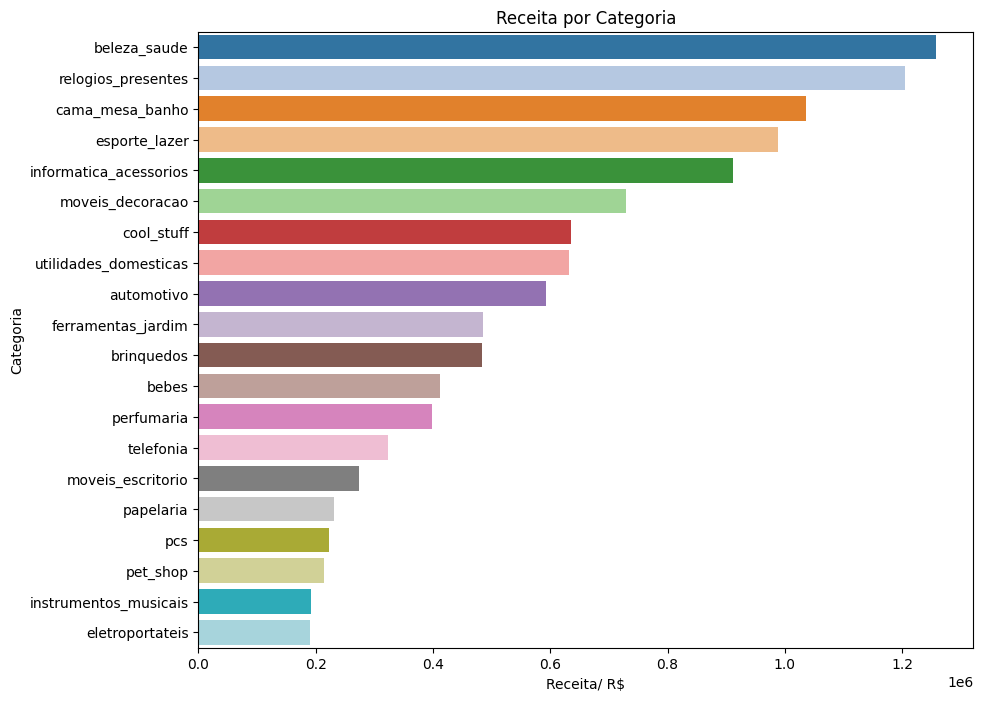

In [57]:
top20 = df_rev_cat[:20]
plt.figure(figsize=(10,8))
sns.barplot(data=top20, x='price', y='product_category_name', palette='tab20')
plt.title('Receita por Categoria')
plt.xlabel('Receita/ R$')
plt.ylabel('Categoria')

plt.show()

##  2.4 Vendas - Série Temporal

In [58]:
time_series = df_order_status.merge(df_itens, on='order_id', how='inner')
time_series.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112649,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36


In [59]:
time_series.shape

(112650, 14)

In [60]:
time_series_clean = time_series[['order_id', 'order_purchase_timestamp', 'price']]
time_series_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_purchase_timestamp  112650 non-null  object 
 2   price                     112650 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.4+ MB


In [61]:
time_series_clean['order_purchase_timestamp']=pd.to_datetime(time_series_clean['order_purchase_timestamp'])
time_series_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_purchase_timestamp  112650 non-null  datetime64[ns]
 2   price                     112650 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.4+ MB


<ipython-input-61-1a7a07afd142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_clean['order_purchase_timestamp']=pd.to_datetime(time_series_clean['order_purchase_timestamp'])


In [62]:
time_series_clean['convert_time']=pd.to_datetime(time_series_clean['order_purchase_timestamp'].dt.strftime('%Y-%m-%d'))
time_series_clean.head()

<ipython-input-62-78ff90729088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_clean['convert_time']=pd.to_datetime(time_series_clean['order_purchase_timestamp'].dt.strftime('%Y-%m-%d'))


,order_id,order_purchase_timestamp,price,convert_time
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90,2018-02-13


In [63]:
sales_day=time_series_clean.groupby(["convert_time"]).agg({"order_id":"count", 'price':"sum"}).reset_index()
sales_day

,convert_time,order_id,price
0,2016-09-04,2,72.89
1,2016-09-05,1,59.50
2,2016-09-15,3,134.97
3,2016-10-02,1,100.00
4,2016-10-03,8,463.48
...,...,...,...
611,2018-08-26,82,"8,070.71"
612,2018-08-27,71,"5,345.91"
613,2018-08-28,45,"3,673.91"
614,2018-08-29,16,"1,546.04"


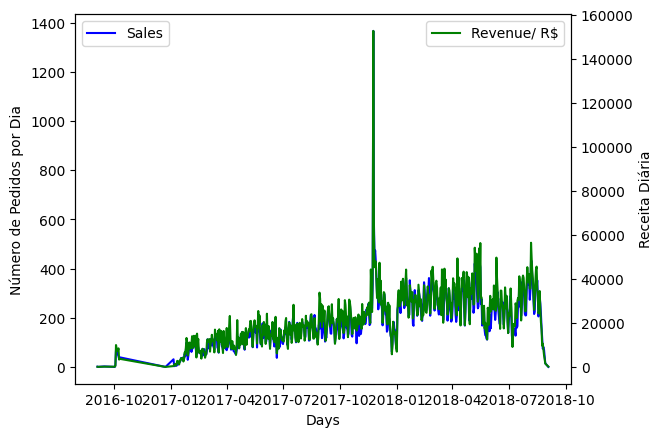

In [64]:
fig,ax = plt.subplots()
ax.plot(sales_day.convert_time, sales_day.order_id, color="blue", label="Sales")
ax.set_xlabel("Days")
ax.set_ylabel("Número de Pedidos por Dia")



ax2 = ax.twinx()
ax2.plot(sales_day.convert_time, sales_day.price, color="green", label="Revenue/ R$")
ax2.set_ylabel("Receita Diária")

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [65]:
sales_day[sales_day['order_id']==sales_day['order_id'].max()]

,convert_time,order_id,price
336,2017-11-24,1366,"152,653.74"


Há um claro valor atípico nos dados, que ocorre em 24 de novembro, coincidindo com a Black Friday. E em 2017, os preços estavam realmente bons. 🙂

In [66]:
sales_day.sort_values(by=['price'], ascending=False)[:10]

,convert_time,order_id,price
336,2017-11-24,1366,"152,653.74"
337,2017-11-25,580,"60,923.48"
591,2018-08-06,430,"56,427.39"
509,2018-05-16,406,"56,283.73"
500,2018-05-07,421,"54,167.48"
507,2018-05-14,413,"53,842.38"
503,2018-05-10,335,"51,458.67"
535,2018-06-11,338,"49,669.70"
472,2018-04-09,290,"49,308.73"
592,2018-08-07,431,"49,178.98"


Como podemos ver, os dois dias com mais vendas são a Black Friday de 2017 e o dia seguinte.

# 3 Avaliação e Notas - NLP Análise

O principal objetivo desta análise é obter insights sobre as razões por trás das avaliações negativas fornecidas pelos clientes. Para isso, iremos empregar WordClouds e nltk para analisar as expressões mais frequentes usadas nas mensagens de texto. Em seguida, exploraremos a relação entre essas expressões e as pontuações de avaliação correspondentes.


## 3.1 Pre-Treatment of Messages

In [67]:
### Backup df
df_rev = df_reviews[['review_score','review_comment_message']]

In [68]:
clean_msg = df_rev.dropna()

In [69]:
clean_msg.head()

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."


In [70]:
# Pre-processing of text reviews
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)    

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase 
    text = text.lower()
    return text

In [ ]:
clean_msg['processed_review_message'] = clean_msg['review_comment_message'].astype(str).apply(pre_process)


In [72]:
clean_msg.head()

,review_score,review_comment_message,processed_review_message
3,5,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
9,4,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","mas um pouco ,travando...pelo valor ta boa."
15,5,"Vendedor confiável, produto ok e entrega antes...","vendedor confiável, produto ok e entrega antes..."


## 3.2 WordCloud

In [73]:
dislike_clean_msg = clean_msg[clean_msg['review_score']<3]
all_words = ' '.join([word for word in dislike_clean_msg['processed_review_message']])

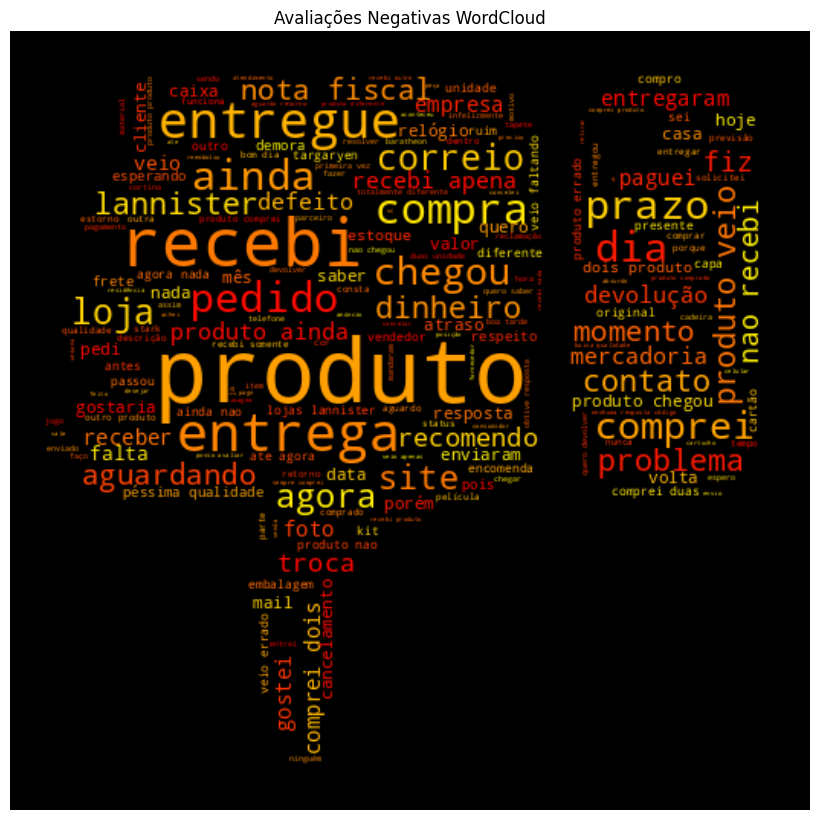

In [74]:
# Generate a word cloud image - Dislike
mask = np.array(Image.open("dislike3.jpg"))
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

wordcloud_dislike = WordCloud(height=2000, width=2000,
                              background_color="black", mode="RGBA",
                              stopwords=stopwords, mask=mask, colormap='autumn',
                              collocation_threshold = 3).generate(all_words)


plt.figure(figsize=[8, 8])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_dislike, interpolation="bilinear")
plt.title("Avaliações Negativas WordCloud")
# Store visualization to file
plt.savefig("dislike_wc.png", format="png")

plt.show()

In [75]:
like_clean_msg = clean_msg[clean_msg['review_score']>3]
all_words_like = ' '.join([word for word in like_clean_msg['processed_review_message']])

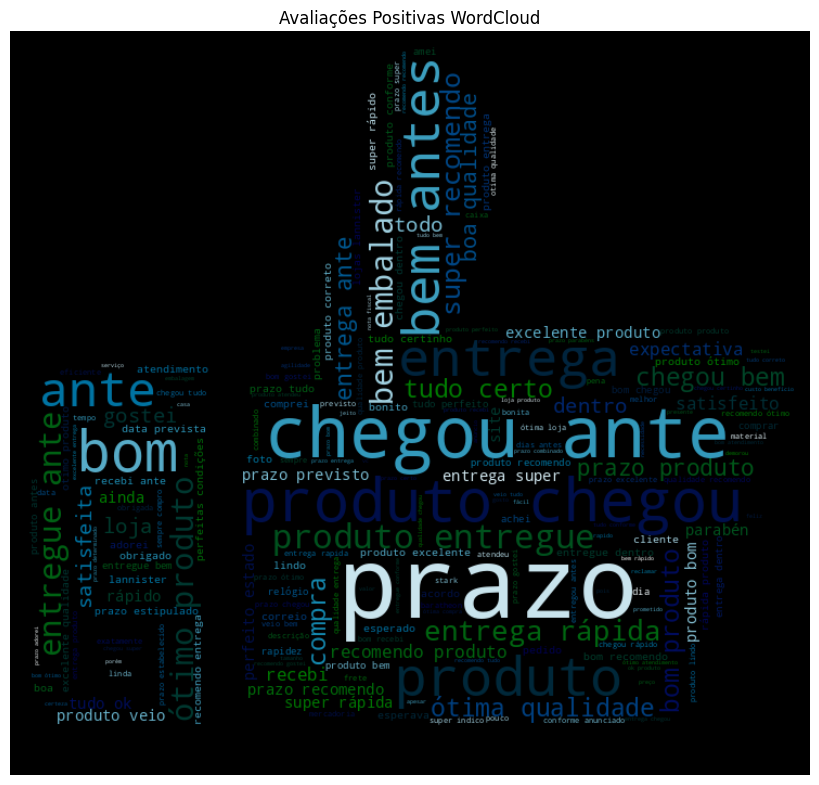

In [76]:
mask = np.array(Image.open("like.jpg"))
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

wordcloud_like = WordCloud(height=2000, width=2000,
                              background_color="black", mode="RGBA",
                              stopwords=stopwords, mask=mask, colormap='ocean',collocation_threshold = 3).generate(all_words_like)


plt.figure(figsize=[8, 8])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_like, interpolation="bilinear")
plt.title("Avaliações Positivas WordCloud")
# Store visualization to file
plt.savefig("like_wc.png", format="png")

plt.show()

Ao observar as wordclouds, podemos ver que a nuvem de palavras negativas mostra palavras relacionadas a atrasos na data de entrega. Enquanto as avaliações positivas estão relacionadas à qualidade do produto e do serviço. Podemos usar outro recurso da NLP para buscar entender a distribuição das avaliações - Ngramas análises.

## 3.2 Trigramas

Gera e retorna uma lista de tuples contendo os Ngramas mais comuns e o valor de ocorrência:

In [77]:
stopwords = list(nltk.corpus.stopwords.words('portuguese'))

def get_top_n_ngrams(text, n=None, ngram=2):
    # Converte uma coleção de documentos de texto em uma matriz de contagem de tokens.  
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(text)
    # Transformar documentos em uma matriz documento-termo 
    bag_of_words = vec.transform(text)
    # Frequência de cada palavra em todo o corpus
    sum_words = bag_of_words.sum(axis=0)
    
    # vec.vocabulary_.items()- Retorna um dicionanario com palavra com key e o index como value. 
    # itetra o dict para obter o valor correspondente a cada palavra e returan uma lista tuples
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    

    #  ordena os Ngrams em ordem decrescente com relação a frequência.
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


# # Get top 20 bigrams
# common_bigrams = get_top_n_ngrams(dislike_clean_msg['processed_review_message'], 20, ngram=2)
# print(common_bigrams)

# Get top 20 trigrams
trigrams = get_top_n_ngrams(dislike_clean_msg['processed_review_message'], 20, ngram=3)
print(trigrams)
df_trigrams = pd.DataFrame(trigrams, columns=['TrigramText', 'count'])

[('não recebi produto', 650), ('não foi entregue', 415), ('ainda não recebi', 375), ('até agora não', 199), ('produto não foi', 199), ('recebi meu produto', 192), ('prazo de entrega', 191), ('não recebi meu', 182), ('dinheiro de volta', 152), ('produto não chegou', 132), ('meu dinheiro de', 130), ('até momento não', 125), ('produto ainda não', 123), ('gostaria de saber', 121), ('veio com defeito', 117), ('ainda não chegou', 114), ('produto veio com', 103), ('nao recebi produto', 101), ('momento não recebi', 96), ('em contato com', 96)]


Para as avaliações negativas:

In [ ]:
# fig_trigrams = px.bar(df_trigrams, x='TrigramText', y='count', title='Trigram Counts', color = 'count',width=1000, height=800, color_continuous_scale='Jet')
# fig_trigrams.update_xaxes(tickangle = 45)

# fig_trigrams.show()

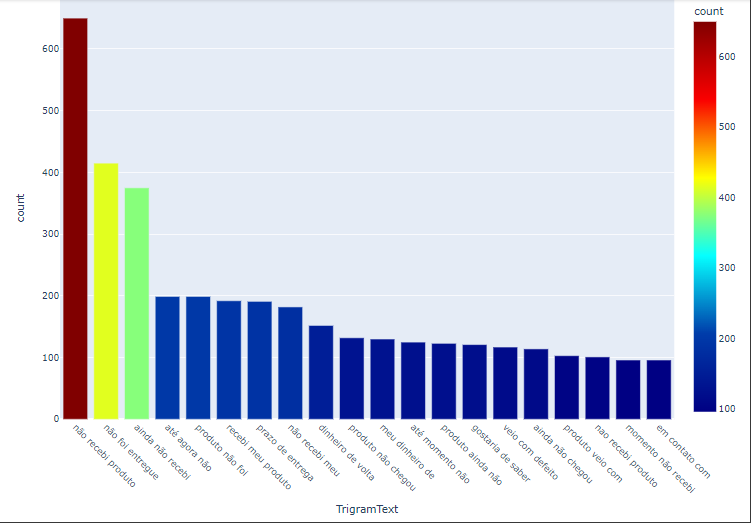

Para as avalição positivas:


In [79]:
trigrams_positive = get_top_n_ngrams(like_clean_msg['processed_review_message'], 20, ngram=3)
print(trigrams_positive)
df_trigrams_positive = pd.DataFrame(trigrams_positive, columns=['TrigramText', 'count'])



[('antes do prazo', 3982), ('chegou antes do', 1181), ('dentro do prazo', 909), ('bem antes do', 824), ('entregue antes do', 598), ('entrega antes do', 419), ('chegou bem antes', 403), ('produto chegou antes', 393), ('produto muito bom', 390), ('de ótima qualidade', 380), ('entregue no prazo', 375), ('chegou no prazo', 346), ('antes da data', 339), ('antes do previsto', 328), ('prazo de entrega', 316), ('de boa qualidade', 314), ('do prazo previsto', 307), ('produto de qualidade', 304), ('muito antes do', 294), ('em perfeito estado', 289)]


In [ ]:
# fig_trigrams = px.bar(df_trigrams_positive, x='TrigramText', y='count', title='Trigram Counts', color = 'count',width=1000, height=800, color_continuous_scale='deep')
# fig_trigrams.update_xaxes(tickangle = 45)
# fig_trigrams.show()

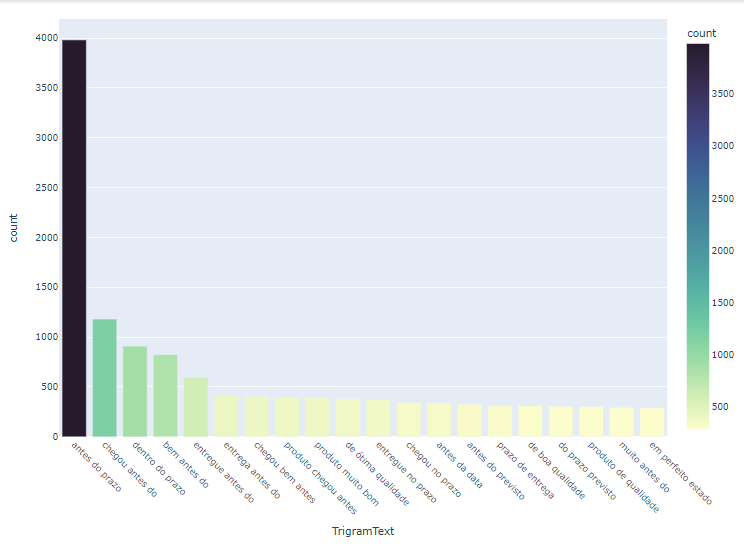

Fica claro o quanto o cumprimento com o prazo de entrega estimado influencia no teor das avaliações positiva e negativamente. Em segundo plano temos comentrários relacionados a qualidade e integridade do produto.

## 3.4 Influência da Data de Entrega

Pode-se avaliar o teor as notas a relação a notas com o atarso da entrega.


In [81]:
df_order_status.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [82]:
df_order_status[['order_delivered_customer_date', 'order_estimated_delivery_date']] = pd.to_datetime(df_order_status[['order_delivered_customer_date', 'order_estimated_delivery_date']].stack()).unstack()

In [83]:
df_order_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [84]:
df = pd.merge(df_order_status, df_reviews, on="order_id", how='inner')
df_delivery_date = df[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score']]
df_delivery_date.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18,4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13,4
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04,5
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26,5


In [ ]:
# Gera uma nova coluna contendo informação se a entrega ocorreu no tempo estimado ou em atraso(no grupo de atraso estçao inclisos entrega não concluidas)
deli_list=[]
for delivery, estimate in zip(df_delivery_date.order_delivered_customer_date, df_delivery_date.order_estimated_delivery_date):
  if delivery <= estimate:
    deli_list.append("On Time")
  else:
    deli_list.append("Delayed")
  
df_delivery_date["status"] = deli_list



In [86]:
df_delivery_date.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date,review_score,status
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18,4,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13,4,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04,5,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15,5,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26,5,On Time


<Figure size 1000x1400 with 0 Axes>

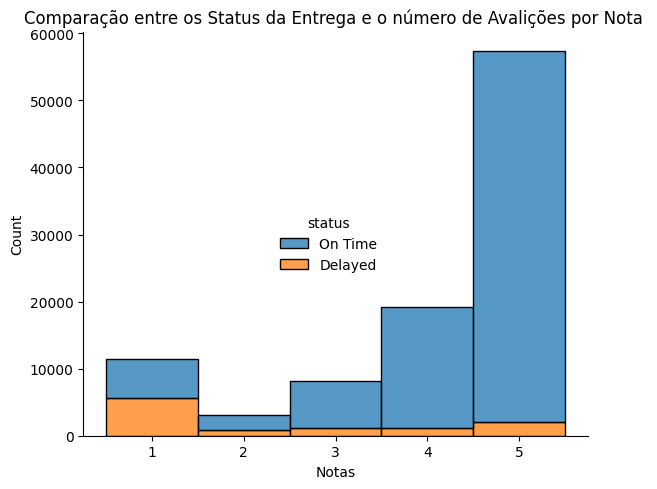

In [87]:
plt.figure(figsize=(10,14))
ax = sns.displot(data=df_delivery_date, x='review_score', hue="status", multiple='stack', discrete=True)

plt.title("Comparação entre os Status da Entrega e o número de Avalições por Nota ")
plt.tight_layout()
plt.xlabel('Notas')
sns.move_legend(ax, loc=("center"))
plt.show()

In [88]:
delayed = df_delivery_date[df_delivery_date.order_delivered_customer_date > df_delivery_date.order_estimated_delivery_date]
on_time = df_delivery_date[df_delivery_date.order_delivered_customer_date <= df_delivery_date.order_estimated_delivery_date]

In [89]:
print(f'A nota média para uma entrega atrasada foi de:{delayed.review_score.mean()}')
print(f'A nota média para uma entrega no prazo foi de:{on_time.review_score.mean()}')


A nota média para uma entrega atrasada foi de:2.566549798727438
A nota média para uma entrega no prazo foi de:4.293577567732184


# 4 Conclusão

Pode-se observar as tendências e principais características dos dados em relação às vendas, receita, categorias e pontuações de avaliação na seção de Análise Exploratória de Dados (EDA).

A partir da análise das mensagens de texto das avaliações, ficou claro o quanto o cumprimento do prazo estimado de entrega reflete nas opiniões dos clientes, tanto positivas quanto negativas para um E-commerce.

# 5 Referências

1. Dataset:

  https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv

2. Referências para NLP:

  https://www.learnpythonwithrune.org/how-to-use-natural-language-processing-for-trigrams/

  https://medium.com/@ka2612/the-chatgpt-phenomenon-unraveling-insights-from-500-000-tweets-using-nlp-8ec0ad8ffd37


3. Brasil GeoJSON:

  https://www.kaggle.com/datasets/thiagobodruk/brazil-geojson



